In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0,]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

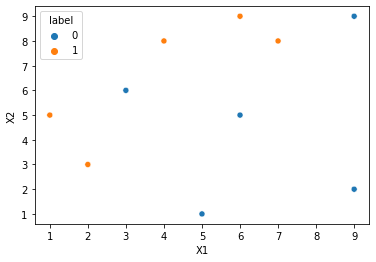

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
x


array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]], dtype=int64)

In [22]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [23]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

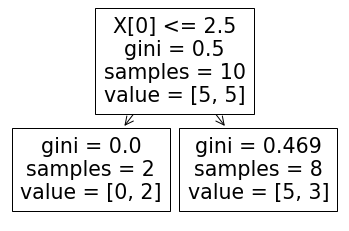

In [24]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

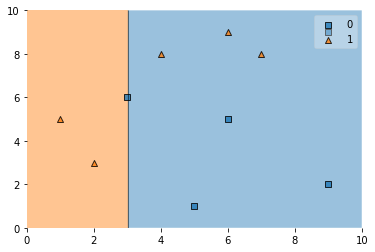

In [25]:
plot_decision_regions(x,y,clf=dt1,legend=True)

In [26]:
df['y_pred']=dt1.predict(x)

In [27]:
df['y_pred']

0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y_pred, dtype: int64

In [28]:
df

,X1,X2,label,y_pred
0,1,5,1,1
1,2,3,1,1
2,3,6,0,0
3,4,8,1,0
4,5,1,0,0
5,6,9,1,0
6,6,5,0,0
7,7,8,1,0
8,9,9,0,0
9,9,2,0,0


In [29]:
df['weights']=1/df.shape[0]

In [30]:
df

,X1,X2,label,y_pred,weights
0,1,5,1,1,0.1
1,2,3,1,1,0.1
2,3,6,0,0,0.1
3,4,8,1,0,0.1
4,5,1,0,0,0.1
5,6,9,1,0,0.1
6,6,5,0,0,0.1
7,7,8,1,0,0.1
8,9,9,0,0,0.1
9,9,2,0,0,0.1


In [31]:
def calculate_weight_error(error):
    return 0.5*np.log((1-error)/error)
calculate_weight_error(0.3)

0.42364893019360184

In [32]:
def update_weight(row,error=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-error)
    else:
        return row['weights']*np.exp(error)

In [33]:
df['update_weights']=df.apply(update_weight,axis=1)

In [34]:
df

,X1,X2,label,y_pred,weights,update_weights
0,1,5,1,1,0.1,0.065508
1,2,3,1,1,0.1,0.065508
2,3,6,0,0,0.1,0.065508
3,4,8,1,0,0.1,0.152653
4,5,1,0,0,0.1,0.065508
5,6,9,1,0,0.1,0.152653
6,6,5,0,0,0.1,0.065508
7,7,8,1,0,0.1,0.152653
8,9,9,0,0,0.1,0.065508
9,9,2,0,0,0.1,0.065508


In [35]:
df['update_weights'].sum()

0.9165153319682015

In [37]:
df['normalized_weights']=df['update_weights']/df['update_weights'].sum()

In [38]:
df

,X1,X2,label,y_pred,weights,update_weights,normalized_weights
0,1,5,1,1,0.1,0.065508,0.071475
1,2,3,1,1,0.1,0.065508,0.071475
2,3,6,0,0,0.1,0.065508,0.071475
3,4,8,1,0,0.1,0.152653,0.166559
4,5,1,0,0,0.1,0.065508,0.071475
5,6,9,1,0,0.1,0.152653,0.166559
6,6,5,0,0,0.1,0.065508,0.071475
7,7,8,1,0,0.1,0.152653,0.166559
8,9,9,0,0,0.1,0.065508,0.071475
9,9,2,0,0,0.1,0.065508,0.071475


In [39]:
df['normalized_weights'].sum()

1.0

In [40]:
df['cumsum']=np.cumsum(df['normalized_weights'])
df['cumsum_upper']=np.cumsum(df['normalized_weights'])
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [41]:
df

,X1,X2,label,y_pred,weights,update_weights,normalized_weights,cumsum,cumsum_upper,cumsum_lower
0,1,5,1,1,0.1,0.065508,0.071475,0.071475,0.071475,0.000000
1,2,3,1,1,0.1,0.065508,0.071475,0.142950,0.142950,0.071475
2,3,6,0,0,0.1,0.065508,0.071475,0.214425,0.214425,0.142950
3,4,8,1,0,0.1,0.152653,0.166559,0.380983,0.380983,0.214425
4,5,1,0,0,0.1,0.065508,0.071475,0.452458,0.452458,0.380983
5,6,9,1,0,0.1,0.152653,0.166559,0.619017,0.619017,0.452458
6,6,5,0,0,0.1,0.065508,0.071475,0.690492,0.690492,0.619017
7,7,8,1,0,0.1,0.152653,0.166559,0.857050,0.857050,0.690492
8,9,9,0,0,0.1,0.065508,0.071475,0.928525,0.928525,0.857050
9,9,2,0,0,0.1,0.065508,0.071475,1.000000,1.000000,0.928525


In [49]:
def fetch_index(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and  a > row['cumsum_lower'] :
                indices.append(index)
    return indices
                

In [50]:
index_values= fetch_index(df)
index_values

[9, 2, 5, 6, 9, 7, 1, 4, 4, 5]

In [52]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x,y)

AdaBoostClassifier()

In [53]:
abc.predict(x)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [54]:
df['label']

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64